In [1]:
%matplotlib widget

from DatasetTester import *
import matplotlib.pyplot as plt
import numpy as np

from GetLandmarks import GetLandmarks 
from landmark_utils import *

from ProcessResults import *
from LandmarkTester import LandmarkTester 

In [2]:
dataset = DatasetTester("./NeuroFace_Open_Access_Data/ALS/")
patient_id = "A009"
task = "NSM_OPEN"
model_to_use = "MEE"

Patient A002 loading...
Patient A006 loading...
Patient A008 loading...
Patient A009 loading...
Patient A010 loading...
Patient A011 loading...
Patient A012 loading...
Patient A014 loading...
Patient A015 loading...
Patient A016 loading...


[ WARN:0@3.274] global /home/conda/feedstock_root/build_artifacts/libopencv_1647792290612/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('NeuroFace_Open_Access_Data/ALS/Frames/A016_02_NSM_BIGSMILE_color.avi_160.jpg'): can't open/read file: check file path/integrity


Patient A017 loading...


In [3]:
dataset._patients[patient_id].keys()

dict_keys(['BBP_NORMAL', 'DDK_PATAKA', 'DDK_PA', 'NSM_BLOW', 'NSM_KISS', 'NSM_OPEN', 'NSM_SPREAD'])

In [4]:
dataset._patients[patient_id][task].keys()

dict_keys([2, 22, 45, 130, 155, 185, 291, 317, 355, 431, 464, 496, 570])

In [5]:
frame = np.random.choice(list(dataset._patients[patient_id][task].keys()))
#frame = 803
frame

464

In [6]:
dataset._patients[patient_id][task][frame].keys()

dict_keys(['landmarks_gt', 'bbox', 'image', 'landmarks_pred'])

In [7]:
#test._patients[patient_id][task][frame]

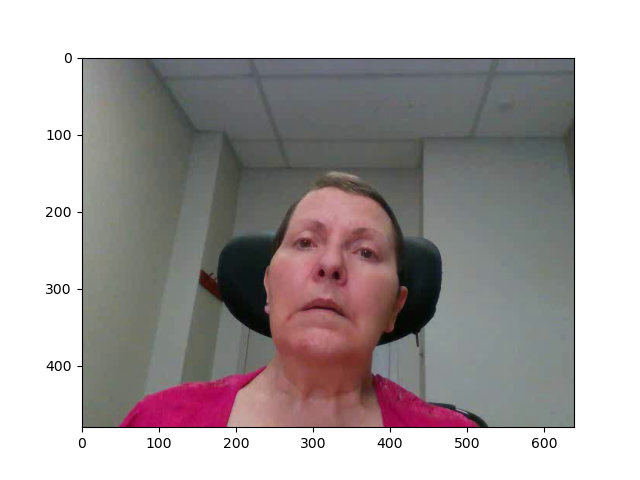

In [8]:
im = dataset._patients[patient_id][task][frame]['image']
plt.figure()
plt.imshow(np.flip(im,axis=-1))
plt.show()

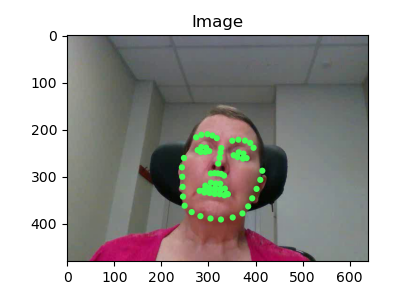

In [9]:
lm_gt = dataset._patients[patient_id][task][frame]['landmarks_gt']
bbox_gt = dataset._patients[patient_id][task][frame]['bbox']

vis_landmarks(np.flip(im,axis=-1), lm_gt)

In [10]:
pr2 = ProcessResults(lm_gt, 'lms_only')
#pr.scale_by_bbox(bbox_gt)
pr2._scaled_by_proportion
pr2._features

{'f0': 1.0382477471082983,
 'f1': 0.7423336395686537,
 'f2': 1.120940916582118,
 'f3': 1.0052447,
 'f4': 0.018122826,
 'f5': 0.012956891,
 'f6': 0.019566607,
 'f7': 0.09963008875753711,
 'f8': 1.1045157,
 'f9': 1.4614512,
 'f10': 1.0505425,
 'f11': 0.05031693265257776,
 'f12': 0.0,
 'f13': 0.10650772365663543,
 'f14': 2.529499430912834,
 'f15': 1.0122526,
 'f16': 1.5220798,
 'f17': 1.5877372,
 'f18': 0.1936334,
 'f19': 0.38152635,
 'f20': 0.36781245,
 'f21': 1.460422064934973,
 'f22': 0.940732652416116,
 'f23': 3.0373104228905277,
 'f24': 1.0203551,
 'f25': 0.76766807,
 'f26': 0.74126875,
 'f27': 0.3119558,
 'f28': 0.13217996}

In [11]:
test_old = LandmarkTester_old(im, model_to_use)

NameError: name 'LandmarkTester_old' is not defined

In [ ]:
test = LandmarkTester(im, model_to_use, 400)

: 

In [ ]:
%%time
test.test_combined(rand_angle=10, scale=15, num_test=50, rand_mode='normal')

: 

: 

In [ ]:
points = test._xy_dist
which_points = np.arange(points.shape[0])

: 

In [ ]:
plt.figure()

implot = plt.imshow(np.flip(im,axis=-1))
ax = plt.gca()

# LM GT
gt_points = np.transpose(lm_gt)
plt.scatter(x=gt_points[0], y=gt_points[1], c='#25f9ff', s=25, alpha=1, edgecolor='none')


# Bad lms
bad_points = np.transpose(test_old._og_landmarks)
plt.scatter(x=bad_points[0], y=bad_points[1], c='#128290', s=20, alpha=1, edgecolor='none')


# OG points
og_points = np.transpose(test._og_landmarks)
plt.scatter(x=og_points[0], y=og_points[1], c='#e0c126', s=25, alpha=1, edgecolor='none')

# Median points
#plt.scatter(x=np.median(points, axis=2)[...,0], y=np.median(points, axis=2)[...,1], c='#ff5742', s=25, alpha=1, edgecolor='none')
med_points = np.transpose(test._median_landmarks)
plt.scatter(x=med_points[0], y=med_points[1], c='#ff5742', s=25, alpha=1, edgecolor='none')



# Mean points
'''
for i in which_points:
    plt.scatter(x=np.mean(points[i,0]), y=np.mean(points[i,1]), c='#fa0fdb', s=20, alpha=1, edgecolor='none')
'''

"""
# Test points
for i in which_points:
    #plt.scatter(x=points[i,0], y=points[i,1], c=params, cmap='bwr', s=10, alpha=1, edgecolor='none')
    plt.scatter(x=points[i,0], y=points[i,1], c='blue',s=10, alpha=0.25, edgecolor='none')
"""

# Labels
#ax.legend(loc='upper left',labels=['Augmented Predictions'])
ax.legend(loc='upper left',labels=['Ground Truth','200px Predictions','500px Predictions', 'Augmented Predictions - Median'])


plt.show()


: 

: 

In [ ]:
RMSE(lm_gt, test_old._og_landmarks)

: 

In [ ]:
RMSE(lm_gt, test._og_landmarks)

: 

In [ ]:
RMSE(lm_gt, test._median_landmarks)

: 

: 

: 

In [ ]:
pr = ProcessResults(lm_gt, 'lms_only')

: 

In [ ]:
pr._features

: 

In [ ]:
f, ax = plt.subplots(6,5, figsize=(4,3), sharex = True, sharey = True)
for i in range(len(ax)):
    for j in range(len(ax[i])):
        idx = i*5+j
        #ax.set_title("Healthy Distribution vs. Patient Feature - f23")
        ax[i,j].hist(fixed_df['f23'], bins=18)
        ax[i,j].axvline(x=-3.8523, color='r', linewidth=2)
        pat_feature_val = 
        percentile = np.percentile(fixed_df['f23'], 5)
        ax[i,j].legend(loc='upper right',labels=['Lower 5th Percentile', 'Patient f23'])

        plt.xlabel("f23")
        plt.ylabel("Observations")
        ax.grid()
        ax.set_xticks(bins)#

: 

In [ ]:
fig, axs = plt.subplots(6, 5)
def vis_triple(I, J, K, figsize = (8,3), shared = True, 
               first_title = 'Original', second_title = 'New',
               third_title = 'Newer',
               show_ticks = True, **kwargs):
    '''
    vis_pair(I, J, figsize = (8,3), shared = True, first_title = 'Original', second_title = 'New'):
    produce a plot of images I and J together. By default takes care of sharing axes to provide
    a little 1x2 plot without all the coding.
    '''
    f, ax = plt.subplots(6,5, figsize=(4,3), sharex = True, sharey = True)
    for a in ax:
        a.plt.hist(fixed_df['f23'])
        a.title("Healthy Distribution vs. Patient Feature - f23")
        a.axvline(x=-3.8523, color='r', linewidth=2)
        a.legend(loc='upper right',labels=['Lower 5th Percentile', 'Patient f23'])
        a.xlabel("f23")
        a.ylabel("Frequency")
        a.grid()


                
    #ax[0].imshow(I, **kwargs)
    #ax[0].set_title(first_title)
    #ax[1].imshow(J, **kwargs)
    #ax[1].set_title(second_title)
    #ax[2].imshow(K, **kwargs)
    #ax[2].set_title(third_title)
    

    plt.tight_layout()

: 

In [ ]:
f, ax = plt.subplots(6,5, figsize=(4,3), sharex = True, sharey = True)
for i in range(len(ax)):
    ax[i].hist(fixed_df['f23'])
    ax[i].title("Healthy Distribution vs. Patient Feature - f23")
    ax[i].axvline(x=-3.8523, color='r', linewidth=2)
    ax[i].legend(loc='upper right',labels=['Lower 5th Percentile', 'Patient f23'])
    ax[i].xlabel("f23")
    ax[i].ylabel("Frequency")
    ax[i].grid()


            
#ax[0].imshow(I, **kwargs)
#ax[0].set_title(first_title)
#ax[1].imshow(J, **kwargs)
#ax[1].set_title(second_title)
#ax[2].imshow(K, **kwargs)
#ax[2].set_title(third_title)


plt.tight_layout()

: 

: 